<a href="https://colab.research.google.com/github/Lanzero225/Diabetes-Analysis/blob/main/diabetes_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Analysis




## Background



### What is Diabetes

Diabetes is a chronic metabolic disease characterized by elevated levels of blood glucose (blood sugar). This occurs because the body either cannot produce enough insulin or cannot effectively use the insulin it produces. Over time, uncontrolled blood sugar leads to serious damage to the heart, blood vessels, eyes, kidneys, and nerves.


### The Dataset Overview

The Dataset, which was gathered by the CDC, is a dataset containing healthcare statistics and lifestyle information of people, and whether or not they have diabetes, is pre-diabetic, or healthy.

The dataset can be found here:
- https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators



#### Variables of the Dataset

The dataset has a total of 22 (sans ID) columns:

Demographic Columns:
- Sex - Sex of the patient.
- Age - Age of the patient grouped into 13 bins.
  - 18-24 = 1
  - 25-29 = 2
  - 30-34 = 3
  - ...
  - 80+ = 13
- Education - Educational attainment of the patient.
  - 1 = Did not attend/only kindergarten
  - 2 = Grade 1 to 8
  - 3 = Grade 9 to 11
  - 4 = Grade 12 or GED graduate
  - 5 = 1st year to 3rd year
  - 6 = 4 or more years/graduate
- Income - Income category of the patient based on annual income.
  - 1 = Less than 10,000 USD (approx. PHP 500,000)
  - 5 = Less than 35,000 USD
  - 8 = 75,000 USD or more  

Laboratory Test Columns:
- Diabetes_binary - Indicator for diabetes (Target Variable).
- HighBP - Indicator for low/high BP.
- HighChol - Indicator for low/high cholesterol.
- BMI - Body Mass Index.

Survey Columns
- CholCheck - Indicator for having a cholesterol check within the last 5 years.
- Smoker - Indicator for smoking at least 100 packs in a patient's lifetime.
- Stroke - Indicator if a patient has had a stroke.
- HeartDiseaseorAttack - Indicator if a patient has/had coronary heart disease or myocardial infarction.
- PhysActivity - Indicator if the patient has done any physical activity in the last month.
- Fruits - Indicator if the patient consumes any fruit in a day.
- Veggies - Indicator if the patient consumes any vegetable in a day.
- HvyAlcoholConsump - Indicator if the patient is a heavy drinker (Varies on gender).
- AnyHealthcare - Indicator if a patient has any health care insurance/coverage/plans.
- NoDocbcCost - Indicator of a patient's inability to visit a doctor due to cost.
- GenHlth - Personal judgement of a patient's health.
- MentHlth - Personal assessment of a patient's mental health, determined by the number of days they didn't have a good mental health.
- PhysHlth - Personal assessment of a patient's physical health, determined by the number of days they didn't have a good physical health.
- DiffWalk - Personal assessment of a patient indicating if they have difficulty in mobility.

### Objective of the Analysis

This analysis aims to examine diabetes indicators of different patients. By analyzing key factors such as prior health conditions, habits, diet, and other variables. This analysis seeks to dig up any notable insights that can help further understand diabetes.


## Data Collection

Before we begin, let us first import the necessary libraries that we need for this analysis.

We will also be importing the dataset which can be located here:
- https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [20]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
diabetes_dataframe = pd.read_csv(path + "/diabetes_binary_health_indicators_BRFSS2015.csv")


Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.


We can see a sample of the first 5 records below. As you can see, there are a lot of binary features that can be found.

In [21]:
diabetes_dataframe.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Looking ta the information of the DataFrame, we can see that all of them are under the  float64 datatypes, which is not the intended type for some of the columns.

In [22]:
diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Data Pre-Processing

We can first begin our process by transforming our dataset into something suitable for analysis.



### Data Cleaning

#### Removing Duplicate Rows

In this first step of Data Cleaning, let us remove records that are duplicate. This doesn't necessarily mean removing those records with the same values, but those with the same ID.

In [30]:
duplicate_rows = diabetes_dataframe[diabetes_dataframe.duplicated(keep=False)]

duplicate_rows.sort_values(by=list(diabetes_dataframe.columns)).head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Category
4517,False,False,False,False,17,False,False,False,True,True,...,False,1,0,0,False,False,8,6,8,Underweight
207307,False,False,False,False,17,False,False,False,True,True,...,False,1,0,0,False,False,8,6,8,Underweight
42369,False,False,False,False,18,False,False,False,True,True,...,False,1,0,0,False,False,10,6,8,Underweight
108949,False,False,False,False,18,False,False,False,True,True,...,False,1,0,0,False,False,10,6,8,Underweight
17475,False,False,False,False,19,False,False,False,True,True,...,False,1,0,0,False,False,4,6,8,Normal
80704,False,False,False,False,19,False,False,False,True,True,...,False,1,0,0,False,False,4,6,8,Normal
152374,False,False,False,False,19,False,False,False,True,True,...,False,1,0,0,False,False,4,6,8,Normal
91414,False,False,False,False,19,False,False,False,True,True,...,False,1,0,0,False,False,6,6,8,Normal
238843,False,False,False,False,19,False,False,False,True,True,...,False,1,0,0,False,False,6,6,8,Normal
48850,False,False,False,False,19,False,False,False,True,True,...,False,2,0,0,False,False,9,6,8,Normal


As seen above, we see multiple records that share the same value, but they all come from different people (Different ID). In this unique case, we should not drop any duplicate rows, since this is a representation of real world data, and coincidences such as these occur all the time.

#### Data Type Casting

Before we begin, let us first fix the typings of each columns. This is to also save memory when it comes to processing the dataset.

In [24]:
integer_columns = ['PhysHlth', 'MentHlth', 'GenHlth', "Age", "Education", "Income", "BMI"]
binary_columns = diabetes_dataframe.columns.difference(integer_columns)

diabetes_dataframe[integer_columns] = diabetes_dataframe[integer_columns].astype('int8')
diabetes_dataframe[binary_columns] = diabetes_dataframe[binary_columns].astype('boolean')

diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  boolean
 1   HighBP                253680 non-null  boolean
 2   HighChol              253680 non-null  boolean
 3   CholCheck             253680 non-null  boolean
 4   BMI                   253680 non-null  int8   
 5   Smoker                253680 non-null  boolean
 6   Stroke                253680 non-null  boolean
 7   HeartDiseaseorAttack  253680 non-null  boolean
 8   PhysActivity          253680 non-null  boolean
 9   Fruits                253680 non-null  boolean
 10  Veggies               253680 non-null  boolean
 11  HvyAlcoholConsump     253680 non-null  boolean
 12  AnyHealthcare         253680 non-null  boolean
 13  NoDocbcCost           253680 non-null  boolean
 14  GenHlth               253680 non-null  int8   
 15  

As seen above, we have went from 42 MB to 9 MB, which will make this entire process more efficient. We can proceed to the next steps of data preparation. Given how all fields have the same number of non-null values to the total records, we do not have to undergo imputation, and as such, we can move on to finding outliers.

#### Outlier Detection

Checking for outliers will be simple at this point. Now that we have converted most of the columns into datatypes, we can simply check the value counts of integer columns.

- PhysHlth, MentHlth - 1 to 30
- GenHlth - 1 to 5
- Age - 1 to 13
- Education - 1 to 6
- Income - 1 to 8

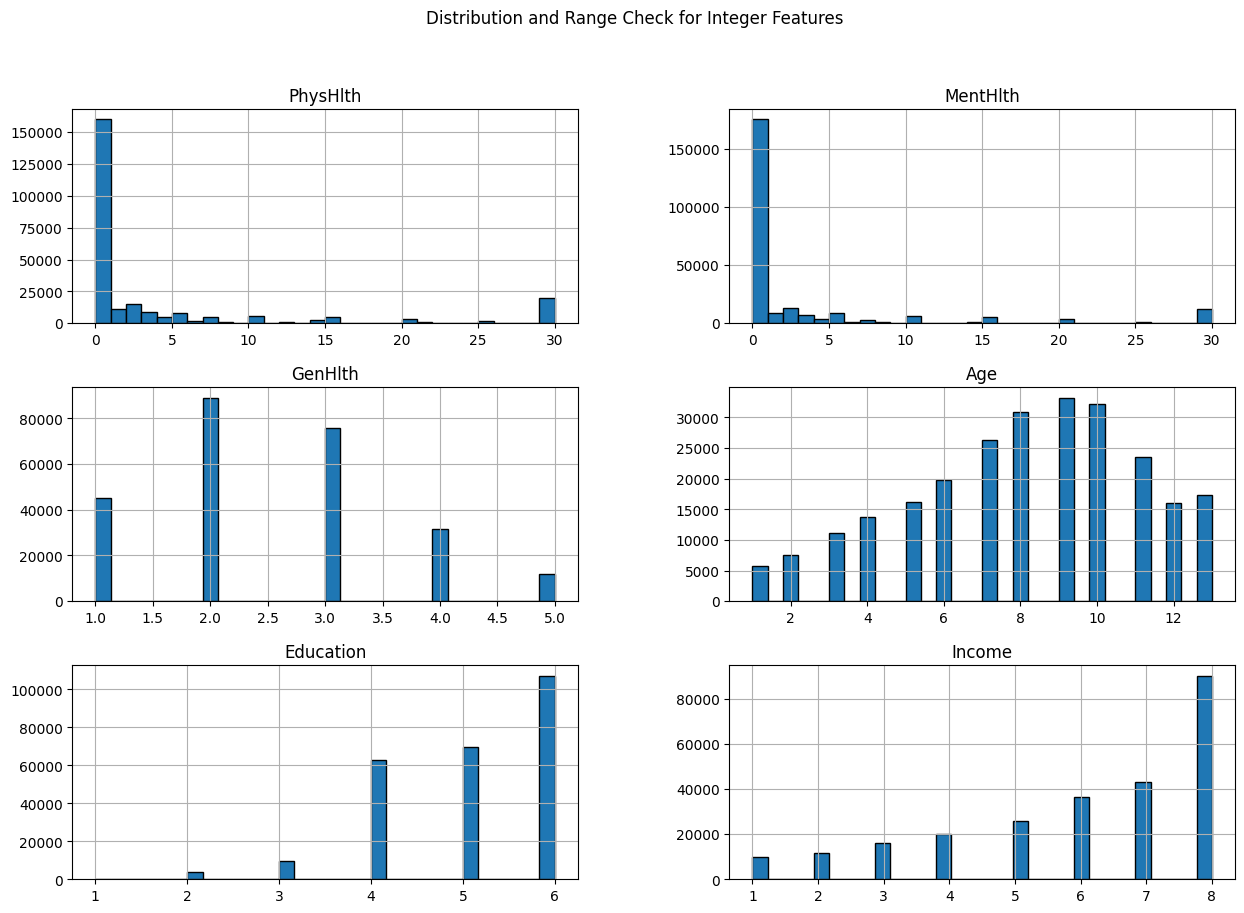

In [39]:
cols_to_check = ['PhysHlth', 'MentHlth', 'GenHlth', 'Age', 'Education', 'Income']
diabetes_dataframe[cols_to_check].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution and Range Check for Integer Features')
plt.show()

Upon graphing each of the integer columns (sans BMI), we can see that all the records are within the set bounds. There are also no obvious outliers. Most people in terms of health see themselves as very healthy, with a slight peak at 30, indicating some find themselves to be extremely unhealthy.

In terms of age, we also see that most people are within the middle age bracket of around 40-50 years old.

In terms of education, most people are actually those that studied in college, with very few having stopped at high school or below. The majority of the patients are also college graduates.

As for income, we can see that most patients have a relatively solid annual income, with the dataset being mostly people in the middle class.

With that completed, let us look into BMI, which aren't categorized yet. Let's plot a boxplot to see the interquartile range and those records that are way too far from Q3.

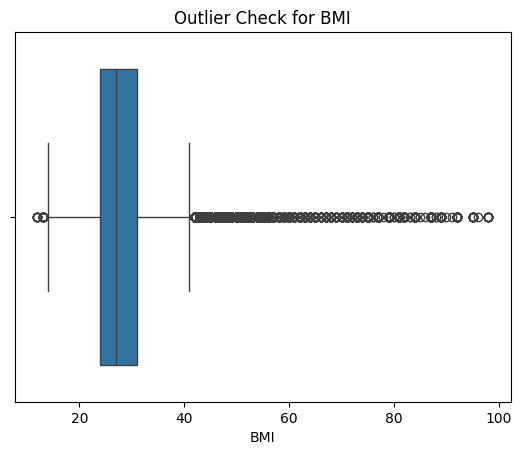

In [40]:
sns.boxplot(x=diabetes_dataframe['BMI'])
plt.title('Outlier Check for BMI')
plt.show()

In [43]:
Q1 = diabetes_dataframe['BMI'].quantile(0.25)
Q3 = diabetes_dataframe['BMI'].quantile(0.75)
IQR = Q3 - Q1

outliers = diabetes_dataframe[(diabetes_dataframe['BMI'] < (Q1 - 1.5 * IQR)) | (diabetes_dataframe['BMI'] > (Q3 + 1.5 * IQR))]
print(f"The 4th quartile starts at BMI: {Q3}")
print(f"Number of BMI outliers: {len(outliers)}")

The 4th quartile starts at BMI: 31.0
Number of BMI outliers: 9847


Upon checking the interquartile range, we can observe that there are 9847 outliers in the BMI column. To see this, let us check these columns.

In [57]:
upper_bound = Q3 + (1.5 * IQR)
print(f"Outliers begin at a BMI of: {upper_bound}")

diabetes_dataframe[diabetes_dataframe['BMI'] >= 41.05].head()

Outliers begin at a BMI of: 41.5


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Category
85,True,True,True,True,45,False,False,False,False,False,...,False,4,2,30,True,False,9,6,8,Class 3 Obese
97,False,True,False,True,45,False,False,False,True,True,...,False,3,0,0,False,False,9,4,6,Class 3 Obese
156,True,True,True,True,47,True,False,False,False,True,...,False,3,0,0,True,False,11,6,5,Class 3 Obese
188,False,True,False,True,43,True,False,False,False,False,...,False,4,0,7,True,False,10,5,2,Class 3 Obese
201,True,True,True,True,55,False,False,False,False,True,...,False,4,0,15,False,False,11,5,2,Class 3 Obese


We can check the values that are considered outliers, as seen below:

In [58]:
bmi_outliers_df = diabetes_dataframe[diabetes_dataframe['BMI'] >= 41.05].copy()

bin_edges = list(range(41, 105, 5))

bmi_outliers_df['BMI_Group'] = pd.cut(bmi_outliers_df['BMI'], bins=bin_edges)

outlier_distribution = bmi_outliers_df['BMI_Group'].value_counts().sort_index()
print("Distribution of BMI Outliers:")
print(outlier_distribution)

Distribution of BMI Outliers:
BMI_Group
(41, 46]     5751
(46, 51]     2147
(51, 56]      843
(56, 61]      309
(61, 66]      133
(66, 71]      102
(71, 76]      132
(76, 81]      173
(81, 86]       85
(86, 91]       93
(91, 96]       45
(96, 101]       7
Name: count, dtype: int64


In [59]:
diabetes_dataframe[diabetes_dataframe['BMI'] >= 96].head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Category
36324,False,True,False,True,96,False,False,False,True,False,...,False,2,0,0,False,False,6,4,8,Class 3 Obese
76370,False,False,True,False,98,True,False,False,True,False,...,False,2,10,0,False,False,3,4,6,Class 3 Obese
76394,True,True,True,True,98,True,False,True,False,True,...,False,5,30,30,True,False,8,6,5,Class 3 Obese
76396,True,True,True,True,98,True,True,True,False,True,...,False,4,15,10,True,False,11,5,6,Class 3 Obese
76532,False,True,True,True,98,False,True,False,False,False,...,False,2,0,0,False,False,13,5,8,Class 3 Obese


We are at a standstill. The issue here is that a BMI around 75+ is a bit of a problem, since it looks out of the ordinary and feels like it's only a special case.

We have approximately 500 records where the BMI is above 76. Upon checking, a BMI in that range is feasible, but extremely rare. What we can do is keep them for now as they do not go beyond the human limits

See: https://www.bbc.com/news/av/world-latin-america-42581917

### Feature Engineering

One of the most common ways BMI can be referred to is with their categorical classification:
- Underweight - Less than 18.5
- Healthy - 18.5 - 24.9
- Overweight - 25 - 29.9
- Obesity - 30+
  - Class 1 Obesity - 30 - 34.9
  - Class 2 Obesity - 35 - 39.9
  - Class 3 Obesity - 40+

For this, we will bin the BMI into a categorical column.

https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [25]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Class 1 Obese', 'Class 2 Obese', 'Class 3 Obese']
diabetes_dataframe['BMI_Category'] = pd.cut(diabetes_dataframe['BMI'], bins=bmi_bins, labels=bmi_labels)
diabetes_dataframe['BMI_Category'].value_counts()

,count
BMI_Category,
Overweight,93749
Normal,68953
Class 1 Obese,53451
Class 2 Obese,20663
Class 3 Obese,13737
Underweight,3127


In [26]:
diabetes_dataframe['BMI'].describe()

,BMI
count,253680.000000
mean,28.382364
std,6.608694
min,12.000000
25%,24.000000
50%,27.000000
75%,31.000000
max,98.000000


In [27]:
corr_matrix = diabetes_dataframe.corr()
plt.figure(figsize=(16, 12)) # Optional: adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap of Correlation Matrix') # Optional: add a title
plt.show()


ValueError: could not convert string to float: 'Class 3 Obese'